In [ ]:
# =========================================================================================
# Cell 1: Set up Paths, Imports
# =========================================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the results of our big experiment
results_df = pd.read_csv('../results/correlation_results.csv')

print("Shape of the results dataframe:", results_df.shape)
results_df.head()

Shape of the results dataframe: (588, 9)


,crypto,price_horizon_h,sentiment_window_h,lag_h,pearson_corr,pearson_p_value,spearman_corr,spearman_p_value,n_observations
0,btc,1,1,0,-0.001978,0.853112,-0.002843,0.790174,8760
1,btc,1,1,1,-0.006874,0.520040,-0.010970,0.304635,8759
2,btc,1,1,2,-0.012063,0.258981,-0.009758,0.361222,8758
3,btc,1,1,4,-0.011903,0.265420,-0.017073,0.110159,8756
4,btc,1,1,6,-0.005049,0.636722,-0.000539,0.959772,8754


In [ ]:
# =========================================================================================
# Cell 2: Filer the df for significant p values
# =========================================================================================

# Filter for results that are statistically significant (p-value < 0.05)
significant_results = results_df[results_df['pearson_p_value'] < 0.05].copy()

if significant_results.empty:
    print("!!! No statistically significant correlations found (p < 0.05) in the entire dataset. !!!")
else:
    # Calculate the absolute correlation to find the strongest relationships (positive or negative)
    significant_results['abs_corr'] = significant_results['pearson_corr'].abs()
    
    # Sort by the strongest absolute correlation
    strongest_correlations = significant_results.sort_values(by='abs_corr', ascending=False)
    
    print("--- Top 5 Strongest Statistically Significant Correlations ---")
    print(strongest_correlations.head(5))

--- Top 10 Strongest Statistically Significant Correlations ---
    crypto  price_horizon_h  sentiment_window_h  lag_h  pearson_corr  \
293    btc              168                 168     12     -0.167861   
292    btc              168                 168      6     -0.166834   
291    btc              168                 168      4     -0.166002   
290    btc              168                 168      2     -0.165132   
289    btc              168                 168      1     -0.164758   

     pearson_p_value  spearman_corr  spearman_p_value  n_observations  \
293     2.904798e-55      -0.246236     1.052024e-118            8581   
292     1.223214e-54      -0.238658     1.705421e-111            8587   
291     4.058943e-54      -0.235775     8.198501e-109            8589   
290     1.415905e-53      -0.232551     7.484469e-106            8591   
289     2.413665e-53      -0.230988     1.965676e-104            8592   

     abs_corr  
293  0.167861  
292  0.166834  
291  0.166002  


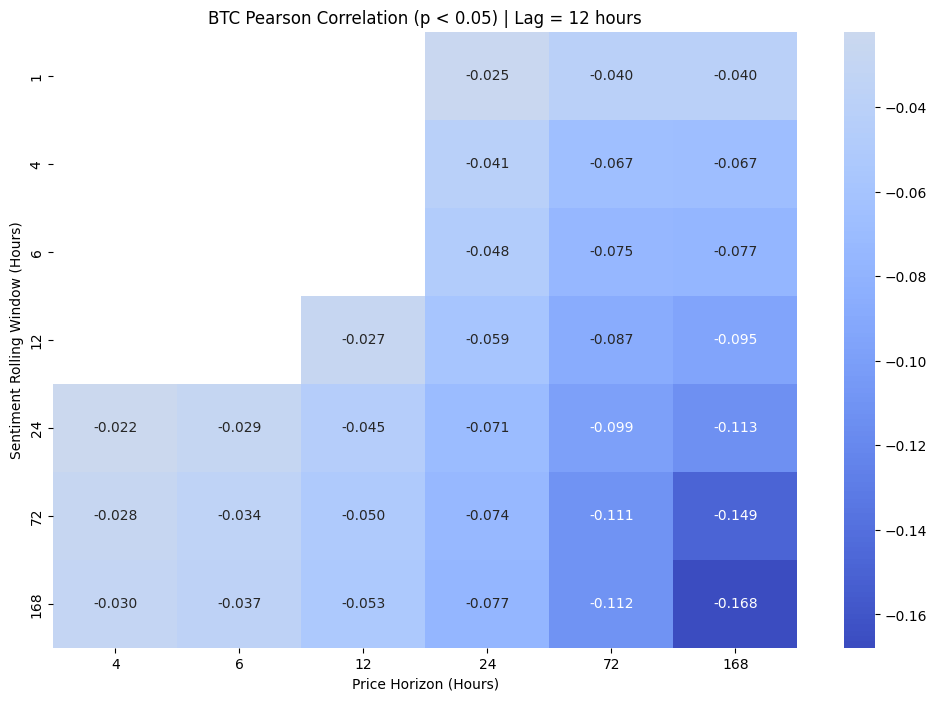

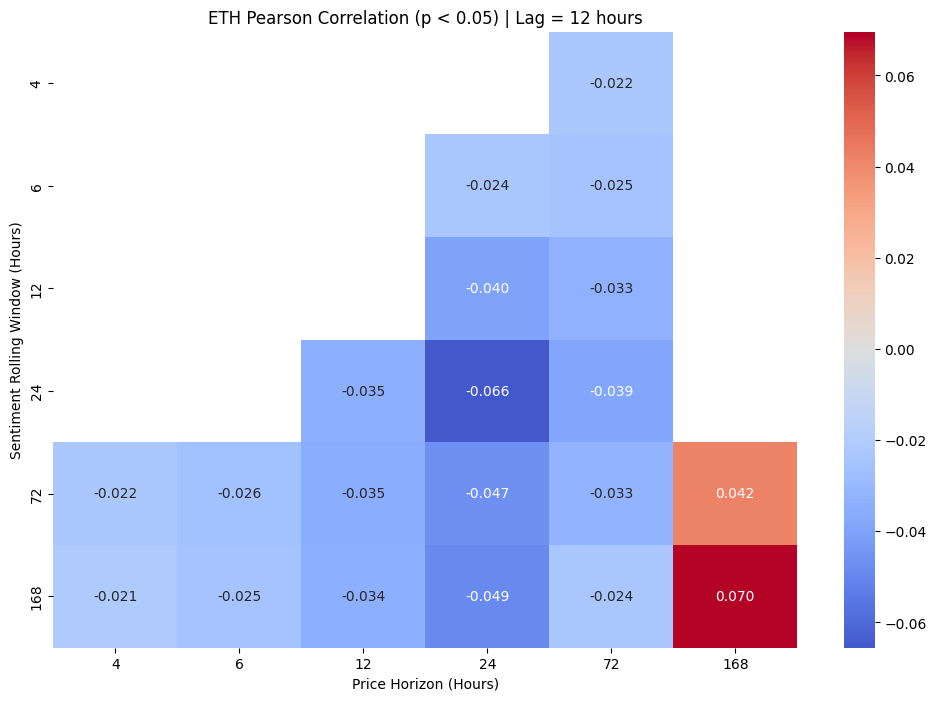

In [7]:
# =========================================================================================
# Cell 3: Visualize results for BTC and ETH
# =========================================================================================

# --- Visualize BTC Results ---
btc_sig_results = significant_results[significant_results['crypto'] == 'btc']

if not btc_sig_results.empty:
    best_btc_lag = btc_sig_results.sort_values(by='abs_corr', ascending=False).iloc[0]['lag_h']
    
    btc_pivot = btc_sig_results[btc_sig_results['lag_h'] == best_btc_lag].pivot(
        index='sentiment_window_h', 
        columns='price_horizon_h', 
        values='pearson_corr'
    )

    plt.figure(figsize=(12, 8))
    sns.heatmap(btc_pivot, annot=True, cmap='coolwarm', fmt=".3f", center=0)
    plt.title(f'BTC Pearson Correlation (p < 0.05) | Lag = {int(best_btc_lag)} hours')
    plt.xlabel('Price Horizon (Hours)')
    plt.ylabel('Sentiment Rolling Window (Hours)')
    plt.show()
else:
    print("No significant correlations found for BTC to plot.")

# --- Visualize ETH Results ---
eth_sig_results = significant_results[significant_results['crypto'] == 'eth']

if not eth_sig_results.empty:
    best_eth_lag = eth_sig_results.sort_values(by='abs_corr', ascending=False).iloc[0]['lag_h']
    
    eth_pivot = eth_sig_results[eth_sig_results['lag_h'] == best_eth_lag].pivot(
        index='sentiment_window_h', 
        columns='price_horizon_h', 
        values='pearson_corr'
    )

    plt.figure(figsize=(12, 8))
    sns.heatmap(eth_pivot, annot=True, cmap='coolwarm', fmt=".3f", center=0)
    plt.title(f'ETH Pearson Correlation (p < 0.05) | Lag = {int(best_btc_lag)} hours')
    plt.xlabel('Price Horizon (Hours)')
    plt.ylabel('Sentiment Rolling Window (Hours)')
    plt.show()
else:
    print("No significant correlations found for ETH to plot.")

In [ ]:
# =========================================================================================
# Cell 4: Generate Summary Tables of Key Findings
# =========================================================================================

if 'significant_results' not in locals() or significant_results.empty:
    print("No significant results to display. Please run the previous cell first.")
else:
    display_cols = [
        'crypto', 'price_horizon_h', 'sentiment_window_h', 'lag_h', 
        'pearson_corr', 'pearson_p_value', 'n_observations'
    ]

    for crypto in ['btc', 'eth']:
        print(f"\n=======================================================================")
        print(f"               ANALYSIS RESULTS FOR {crypto.upper()}")
        print(f"=======================================================================\n")
        
        crypto_df = significant_results[significant_results['crypto'] == crypto]
        
        if crypto_df.empty:
            print(f"No statistically significant correlations found for {crypto.upper()}.")
            continue

        # --- 1. Overall Strongest Correlations (Positive or Negative) ---
        print(f"--- Top 5 Strongest Absolute Correlations for {crypto.upper()} (p < 0.05) ---")
        top_abs = crypto_df.sort_values(by='abs_corr', ascending=False).head(5)
        print(top_abs[display_cols].to_string())
        print("\n")

        # --- 2. Top Positive Correlations ---
        print(f"--- Top 5 Strongest Positive Correlations for {crypto.upper()} (p < 0.05) ---")
        top_pos = crypto_df[crypto_df['pearson_corr'] > 0].sort_values(by='pearson_corr', ascending=False).head(5)
        if top_pos.empty:
            print("No significant positive correlations found.")
        else:
            print(top_pos[display_cols].to_string())
        print("\n")

        # --- 3. Top Negative Correlations ---
        print(f"--- Top 5 Strongest Negative Correlations for {crypto.upper()} (p < 0.05) ---")
        top_neg = crypto_df[crypto_df['pearson_corr'] < 0].sort_values(by='pearson_corr', ascending=True).head(5)
        if top_neg.empty:
            print("No significant negative correlations found.")
        else:
            print(top_neg[display_cols].to_string())
        print("\n")


               ANALYSIS RESULTS FOR BTC

--- Top 5 Strongest Absolute Correlations for BTC (p < 0.05) ---
    crypto  price_horizon_h  sentiment_window_h  lag_h  pearson_corr  pearson_p_value  n_observations
293    btc              168                 168     12     -0.167861     2.904798e-55            8581
292    btc              168                 168      6     -0.166834     1.223214e-54            8587
291    btc              168                 168      4     -0.166002     4.058943e-54            8589
290    btc              168                 168      2     -0.165132     1.415905e-53            8591
289    btc              168                 168      1     -0.164758     2.413665e-53            8592


--- Top 5 Strongest Positive Correlations for BTC (p < 0.05) ---
No significant positive correlations found.


--- Top 5 Strongest Negative Correlations for BTC (p < 0.05) ---
    crypto  price_horizon_h  sentiment_window_h  lag_h  pearson_corr  pearson_p_value  n_observations
2

# Results
- For Bitcoin: Reddit sentiment is a statistically significant long-term contrarian indicator. 
    - A week of high positive sentiment often precedes a week of negative price action. This is a powerful and non-obvious finding.
- For Ethereum : the relationship is more complex.
    - Short-Term (24h): Reddit sentiment is a contrarian indicator, similar to Bitcoin but much faster.
    - Long-Term (168h): Reddit sentiment is a momentum indicator, where sustained positive chatter correlates with positive future price performance.
- The Signal is in the Extremes: The strongest signals for both assets are found at the longest sentiment windows and price horizons (168 hours), suggesting that it's the sustained trends in conversation, not the daily noise, that contain the most information.

Note that the sentiment information is massively reduced and so these findings are more place holders.